# Chapter 3: Classification
## Dataset: MNIST

In [1]:
import numpy as np
# Load dataset
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version =1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
print(mnist["DESCR"])


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

* 'DESCR' : dataset descriptin
* 'data' : one row per instance and one column per feature (np.ndarray)


In [4]:
mnist["details"]

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [1]:
# mnist["feature_names"]

In [6]:
mnist["target"]

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
# Assigning attributes and targets to vars
X, y = mnist["data"], mnist["target"]
X.shape # 28x28 - size of the image

(70000, 784)

=> The values are the intensity of the pixel ranging from 0(white) - 255(black)

In [8]:
y.shape

(70000,)

In [9]:
type(X)

numpy.ndarray

In [10]:
type(y)

numpy.ndarray

In [11]:
# Visualising an instance

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [13]:
some_digit = X[500]
some_digit_image = some_digit.reshape(28,28)

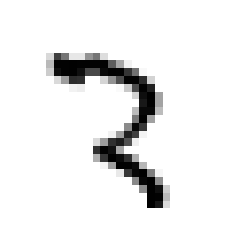

In [14]:
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [15]:
y[500]

'3'

### Casting y from string to int

In [16]:
y = y.astype(np.uint8)

## Assign the already splitted data into test and train variables
### It is also shuffled 

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# BINARY CLASSIFICATION

In [18]:
# 5 and not-5 classifier
# creating target vectors

y_train_5 = (y_train == 5) # True and False 
y_test_5 = (y_test == 5)

In [19]:
y_train_5[:10]

array([ True, False, False, False, False, False, False, False, False,
       False])

## Stochastic Gradient Descent 
* -> Good for Large dataset
* -> trains each independently
* -> well suited for online learning

In [20]:
from sklearn.linear_model import SGDClassifier

In [21]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
sgd_clf.predict([some_digit])

array([False])

# Evaluation of SGDClassifier

## 1. Accuracy using Cross-Validation

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
cross_val_score(sgd_clf, X_train, y_train_5, cv =3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

## Caution:
> Here the accuracyis over 95% seems great BUT actually the dataset is **"skewed"** - number of instances of not-5 instances are 90%. Hence even a dumb classifier that says that everything is not-5 will have a 90% accuracy.

> Hence Accuracy is not always the correct measure

## 2. Confusion Matrix

In [25]:
#  First lets make some "clean" predictions
from sklearn.model_selection import cross_val_predict

In [26]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

* Row: Actual class (first one here is not-5)(Negative class)
* Col: Predicted class

## 3. Precision and Recall
* more presice metrics

In [28]:
from sklearn.metrics import precision_score, recall_score

In [29]:
precision_score(y_train_5, y_train_pred) # shows that this classifier is only 84 % of the times correct

0.8370879772350012

In [30]:
recall_score(y_train_5, y_train_pred) # shows that the classifier only detects 65% of the 5s

0.6511713705958311

## 4. F1 Score
* -> H.M. of precision and recall 
* -> HM emphasises more on lower values hence F1 score will be high only when both will be high

In [31]:
from sklearn.metrics import f1_score

In [32]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

# > Precision/Recall trade-off
Can't have both as high. 
In some applications it is fine to have high recall than precision (for eg. in a child-safe video classifier or a shop-lifter classifier)  
  
  
You can add human pipeline 

## Deciding the right threshold for prediction: 

In [33]:
# we have na option to get the decision score for an instance that the classifier uses
y_scores = sgd_clf.decision_function([some_digit])
y_scores


array([-8470.70199277])

In [34]:
# we can set a threshold value for these scores like:
threshold =0
y_some_digit_pred = (y_scores> threshold) # > threshold then it is a 5
y_some_digit_pred

array([False])

In [35]:
# Decreasing the threshold to -9000
threshold = -9000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

> Here we can see that on decreasing the threshold, we decreased precision (a non 5 is predicted as a 5 now)  
Now to choose the right threshold lets plot a graph

In [36]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [37]:
from sklearn.metrics import precision_recall_curve

In [38]:
precisions, recalls, thresholds= precision_recall_curve(y_train_5, y_scores)

In [39]:
def plot_precision_recall_curve(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recalls")

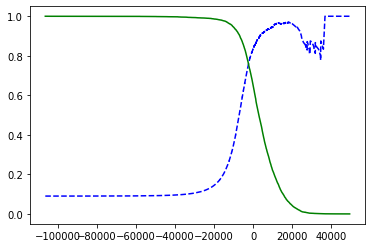

In [40]:
plot_precision_recall_curve(precisions, recalls, thresholds)

In [41]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")

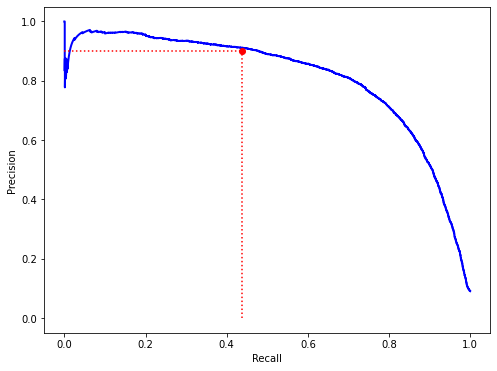

In [42]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:") # From helper repo
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

**Choose the threshold just before the drop BUT the choice depends on the project**  

Say I want a 90% precision then:

In [43]:
# threshold value for the case when the precision >=90 (first occurance)
threshold_90_precision = thresholds[np.argmax(precisions>=0.90)]

In [44]:
# precisions>=0.90

In [45]:
# precisions

In [46]:
# np.argmax(precisions>=0.90) First occurence of true in [precisions>=0.90] 

In [47]:
y_train_pred_90 = (y_scores>= threshold_90_precision)

In [48]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

> **If someone says "Let's reach 90% precision", you should ask, "At what recall?**

## Receiver Operating Characteristic (ROC) Curve

true positive rate vs false positive rate

sensitivity (recall) vs. (1- specificity)

In [49]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [52]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (Fall-out)')
    plt.ylabel('TPR (recall)')
    plt.grid(True)


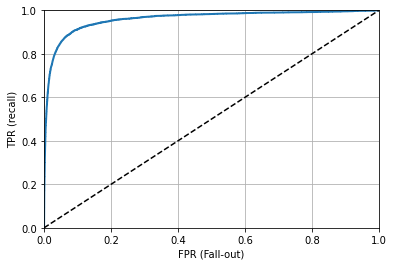

In [53]:
plot_roc_curve(fpr, tpr)
plt.show()

1. One way to compare the performance is by measuring the area under the roc curve (AUC)

* perfect classifier AUC = 1
* purely random classifier AUC = 0.5

In [54]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5, y_scores))

0.9604938554008616


# Trying RandomForestClassifier and checking its ROC curve and ROC AUC Score

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
forest_clf = RandomForestClassifier(random_state=42)
y_probs_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [59]:
y_scores_forest = y_probs_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)


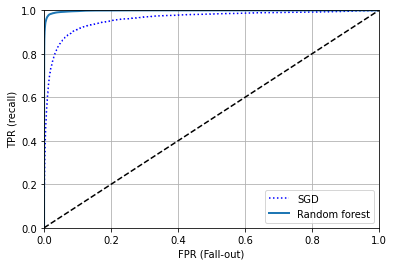

In [60]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random forest")
plt.legend()
plt.show()

-> Here we can conclude that RF is much better than SGD as its ROC is towards top left and the ROC AUC is also higher than SGD

# Multiclass Classification

-> SGD, RandomForest, NB

-> Strictly Bianry: SVM, Linear Regression

* OvR - One vs Rest : one Binary classifier for each class {preferred mostly}
* OvO - One binary classifier for each pair [ (n*(n-1))/2 ] { preferred in algos that do not scale with large data like SVM }

In [62]:
# sklearn will automotacially run either of the 2 depending on the algorithm if we try to do multiclass using binary classifier

from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([7], dtype=uint8)

In [63]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[-0.30043775,  3.75345038,  8.3008785 ,  7.29018477,  2.74196757,
         1.70734964,  0.7043741 ,  9.30884746,  5.85508689,  5.24058678]])

In [64]:
np.argmax(some_digit_scores)

7

In [65]:
#  Similarly, we can also train a SGD or RandomGForest clf 
sgd_clf.fit(X_train, y_train) 
sgd_clf.predict([some_digit])


array([7], dtype=uint8)

In [66]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-42073.47902532, -21924.20417329,  -3178.38027538,
         -5368.62855262, -11563.98862236,  -9930.34001524,
        -22161.10146382,   3567.28299158,  -4304.25754018,
         -9452.86529381]])

In [67]:
np.argmax(some_digit_scores)

7

In [68]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

In [71]:
# scaling and prediciting will increase the accuracy 

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")